Before test, I first import all `Factory` modules from Stlearn library.

For a typical machine learning task, all we need to do is to initialize the relevant `Factory` object, use it to create the relevant `Data` and `Model` object, finally train and evaulate the `Model` object with `Data` object.

During the initial development, I have provided several classical machine learning and deep learning models, which can be accessed from relevant `Factory` object. They are:
* Linear Regression Model and its data
* Random Forest Regressor Model and its data
* AdaBoost Regressor Model and its data
* Simple Neural Network Model and its data
* CNN Model and its data
* LSTM Model and its data

In [1]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *

# Demo for AdaBoostRegressor

In [2]:
df = AdaBoostRegressorFactory('2018-01-01', '2020-01-01', '2021-01-01', '2021-02-01')
data = df.create_data()
model = df.create_model()

X_train shape: (248391, 152)
y_train shape: (248391,)
X_valid shape: (126123, 152)
y_valid shape: (126123,)
X_test shape: (9478, 152)
y_test shape: (9478,)


In [3]:
model.fit(data)

In [4]:
model.info()

AdaBoostRegressor()


In [5]:
model.evaluate(data)

weighted_mean_squared_error: 0.00174


# Demo for LSTM

In [2]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *

X_train shape: (95656, 60, 152)
y_train shape: (95656,)
X_valid shape: (62144, 60, 152)
y_valid shape: (62144,)
X_test shape: (10976, 60, 152)
y_test shape: (10976,)
Parameters number in model:  10888


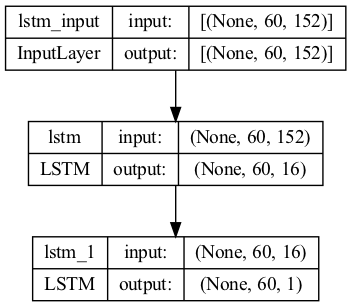

In [3]:
lstmf = LSTMFactory('2019-01-01', '2020-01-01', '2020-07-01', '2020-08-01', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()

Epoch 1/10


2022-11-10 17:01:33.985576: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2990/2990 [==============================] - 54s 18ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - weighted_mean_squared_error: 0.0013 - val_loss: 9.2928e-04 - val_mean_squared_error: 9.2928e-04 - val_weighted_mean_squared_error: 9.2928e-04
Epoch 2/10
2990/2990 [==============================] - 51s 17ms/step - loss: 2.2340e-04 - mean_squared_error: 2.2340e-04 - weighted_mean_squared_error: 2.2340e-04 - val_loss: 9.2924e-04 - val_mean_squared_error: 9.2924e-04 - val_weighted_mean_squared_error: 9.2924e-04
Epoch 3/10
2990/2990 [==============================] - 51s 17ms/step - loss: 2.2338e-04 - mean_squared_error: 2.2338e-04 - weighted_mean_squared_error: 2.2338e-04 - val_loss: 9.2923e-04 - val_mean_squared_error: 9.2923e-04 - val_weighted_mean_squared_error: 9.2923e-04
Epoch 4/10
2990/2990 [==============================] - 51s 17ms/step - loss: 2.2337e-04 - mean_squared_error: 2.2337e-04 - weighted_mean_squared_error: 2.2337e-04 - val_loss: 9.2921e-04 - val_mean_squared_error: 

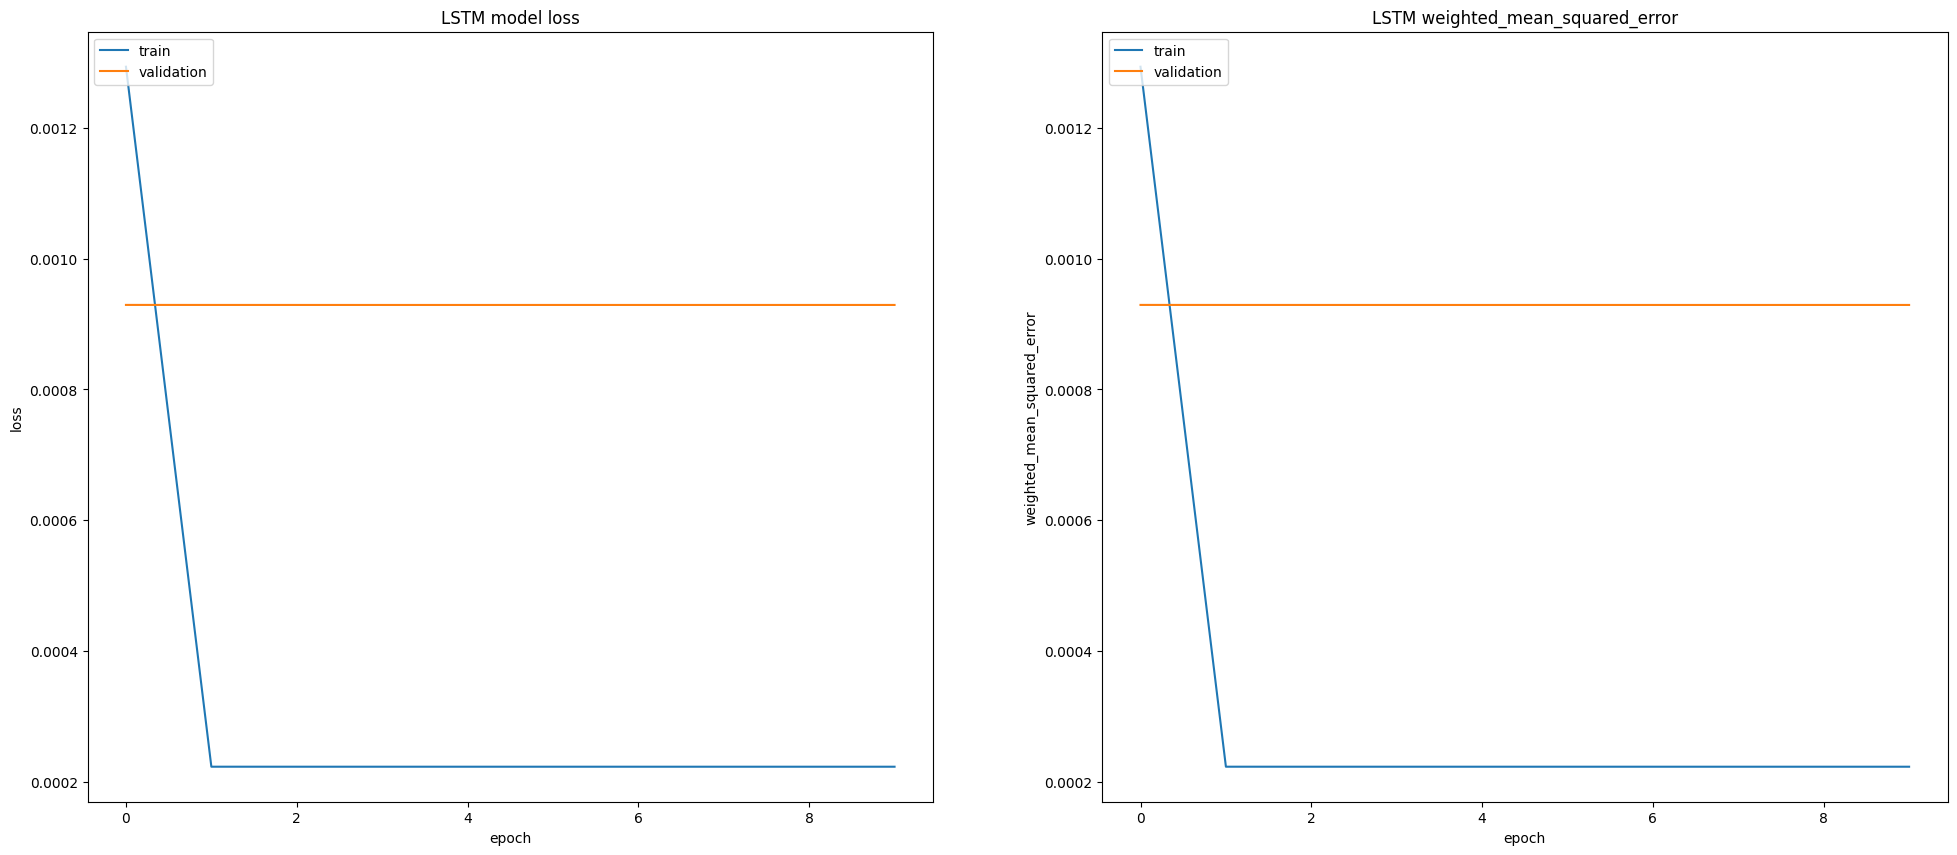

In [4]:
model.fit(data)

In [5]:
model.evaluate(data)

TypeError: evaluate() missing 1 required positional argument: 's'

In [6]:
model.predict(data._X_test[-1:])

1/1 [==============================] - 0s 255ms/step


array([[[1.3465647e-04],
        [8.8223969e-05],
        [7.9735524e-05],
        [7.8255762e-05],
        [7.8010547e-05],
        [7.7971665e-05],
        [7.7965662e-05],
        [7.7964745e-05],
        [1.4580067e-04],
        [8.8100955e-05],
        [7.9578029e-05],
        [7.8217236e-05],
        [7.8003155e-05],
        [7.7970406e-05],
        [7.7965458e-05],
        [7.7964723e-05],
        [7.7964651e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],
        [7.7964643e-05],


In [7]:
t = data._ids_test

In [13]:
first_indexes = pd.DataFrame(t).reset_index().groupby(1)['index'].min()
first_indexes

1
A           0
AAL        21
AAP        43
AAPL       65
ABBV       87
        ...  
YUM     10866
ZBH     10888
ZBRA    10910
ZION    10932
ZTS     10954
Name: index, Length: 499, dtype: int64

In [26]:
pred = model.predict(data._X_test[first_indexes, :])[:, :, 0]
pred_df = pd.DataFrame(pred).T

16/16 [==============================] - 0s 4ms/step


In [28]:
pred_df.columns = first_indexes.index

In [40]:
pred_df.loc[:30, :].mean()

1
A       0.000081
AAL     0.000081
AAP     0.000081
AAPL    0.000081
ABBV    0.000081
          ...   
YUM     0.000093
ZBH     0.000083
ZBRA    0.000083
ZION    0.000119
ZTS     0.000098
Length: 499, dtype: float32

In [37]:
import Portfolio as p
from imp import reload

reload(p)

<module 'Portfolio' from './Stlearn\\Portfolio.py'>

In [38]:
portfolio = p.LongPortfolio(data, model)

In [39]:
t = portfolio.performance

In [40]:
t

mean return: 0.00, volatility: 0.01, sharpe ratio: -2.21

<AxesSubplot:xlabel='Date'>

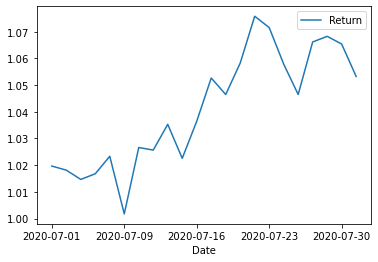

In [41]:
t.portfolio_value.plot()

In [42]:
global_p = p.EmptyPortfolio()

In [43]:
global_p.add_portfolio(portfolio)

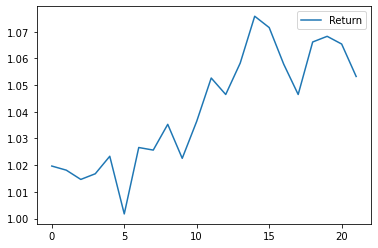

In [45]:
global_p.performance.plot_portfolio_value()

In [2]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *
from Stlearn.Portfolio import *

X_train shape: (95656, 60, 152)
y_train shape: (95656,)
X_valid shape: (62144, 60, 152)
y_valid shape: (62144,)
X_test shape: (10478, 60, 152)
y_test shape: (10478,)
Parameters number in model:  10888
Epoch 1/10


2022-11-10 19:12:56.761021: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2990/2990 [==============================] - 54s 18ms/step - loss: 5.4727e-04 - mean_squared_error: 5.4727e-04 - weighted_mean_squared_error: 5.4727e-04 - val_loss: 9.2926e-04 - val_mean_squared_error: 9.2926e-04 - val_weighted_mean_squared_error: 9.2926e-04
Epoch 2/10
2990/2990 [==============================] - 50s 17ms/step - loss: 2.2339e-04 - mean_squared_error: 2.2339e-04 - weighted_mean_squared_error: 2.2339e-04 - val_loss: 9.2924e-04 - val_mean_squared_error: 9.2924e-04 - val_weighted_mean_squared_error: 9.2924e-04
Epoch 3/10
2990/2990 [==============================] - 50s 17ms/step - loss: 2.2339e-04 - mean_squared_error: 2.2339e-04 - weighted_mean_squared_error: 2.2339e-04 - val_loss: 9.2923e-04 - val_mean_squared_error: 9.2923e-04 - val_weighted_mean_squared_error: 9.2923e-04
Epoch 4/10
2990/2990 [==============================] - 50s 17ms/step - loss: 2.2338e-04 - mean_squared_error: 2.2338e-04 - weighted_mean_squared_error: 2.2338e-04 - val_loss: 9.2921e-04 - val_mean_squ

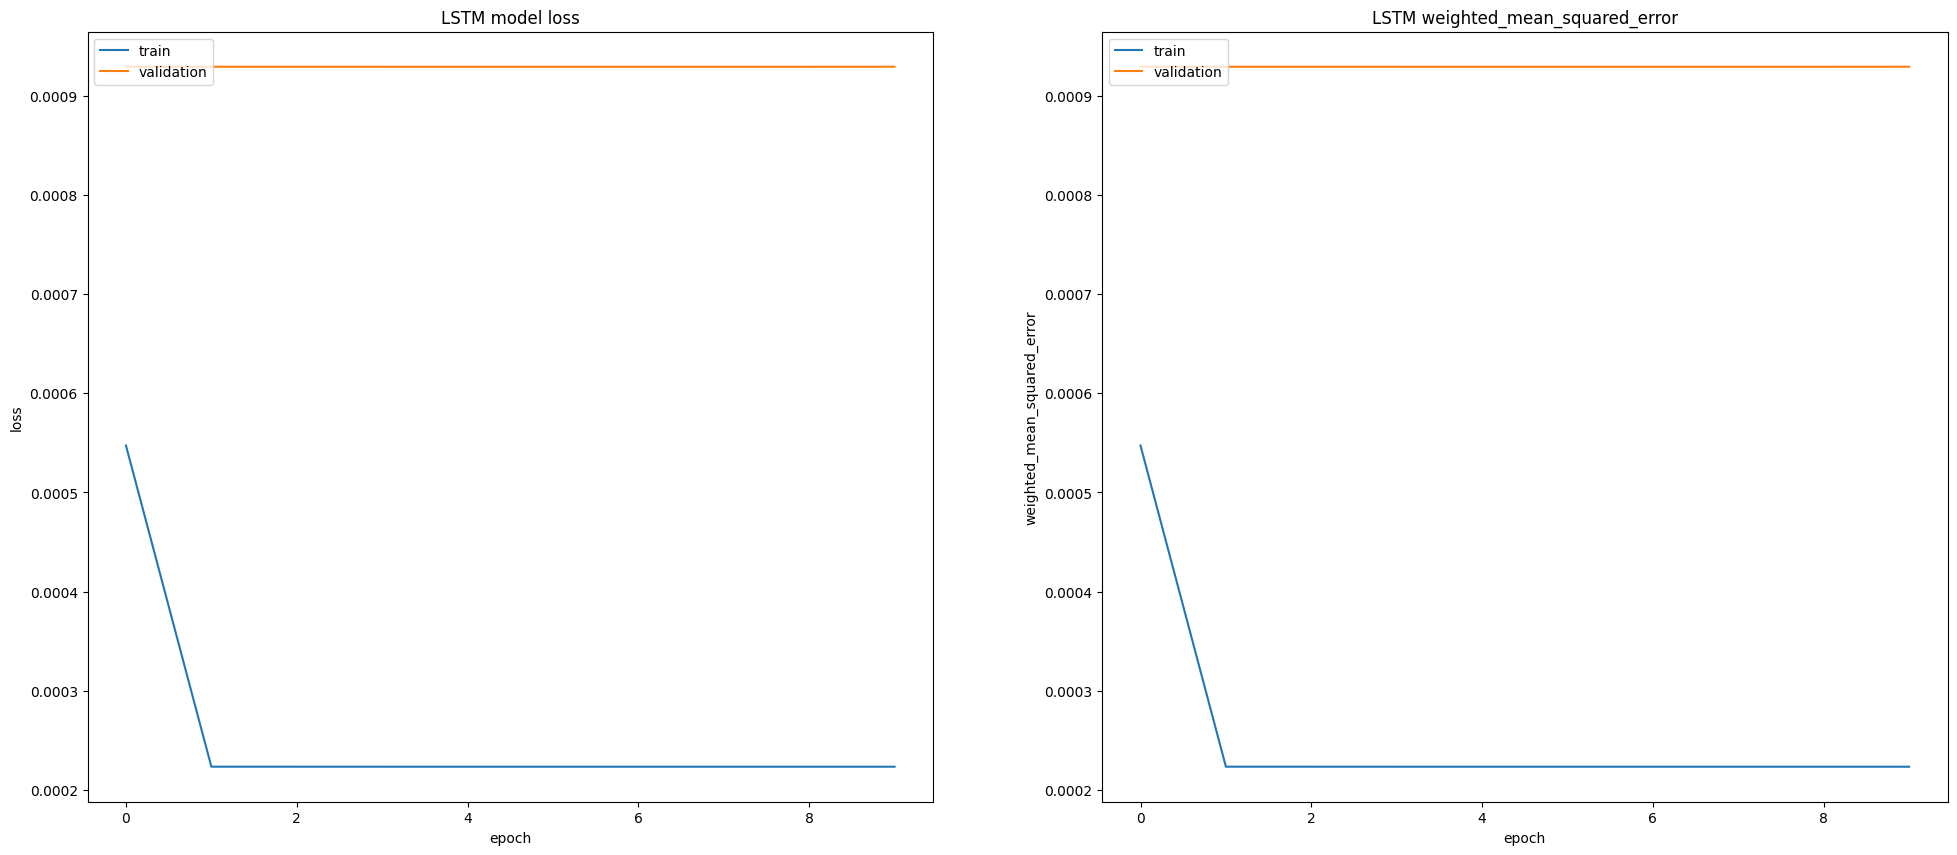

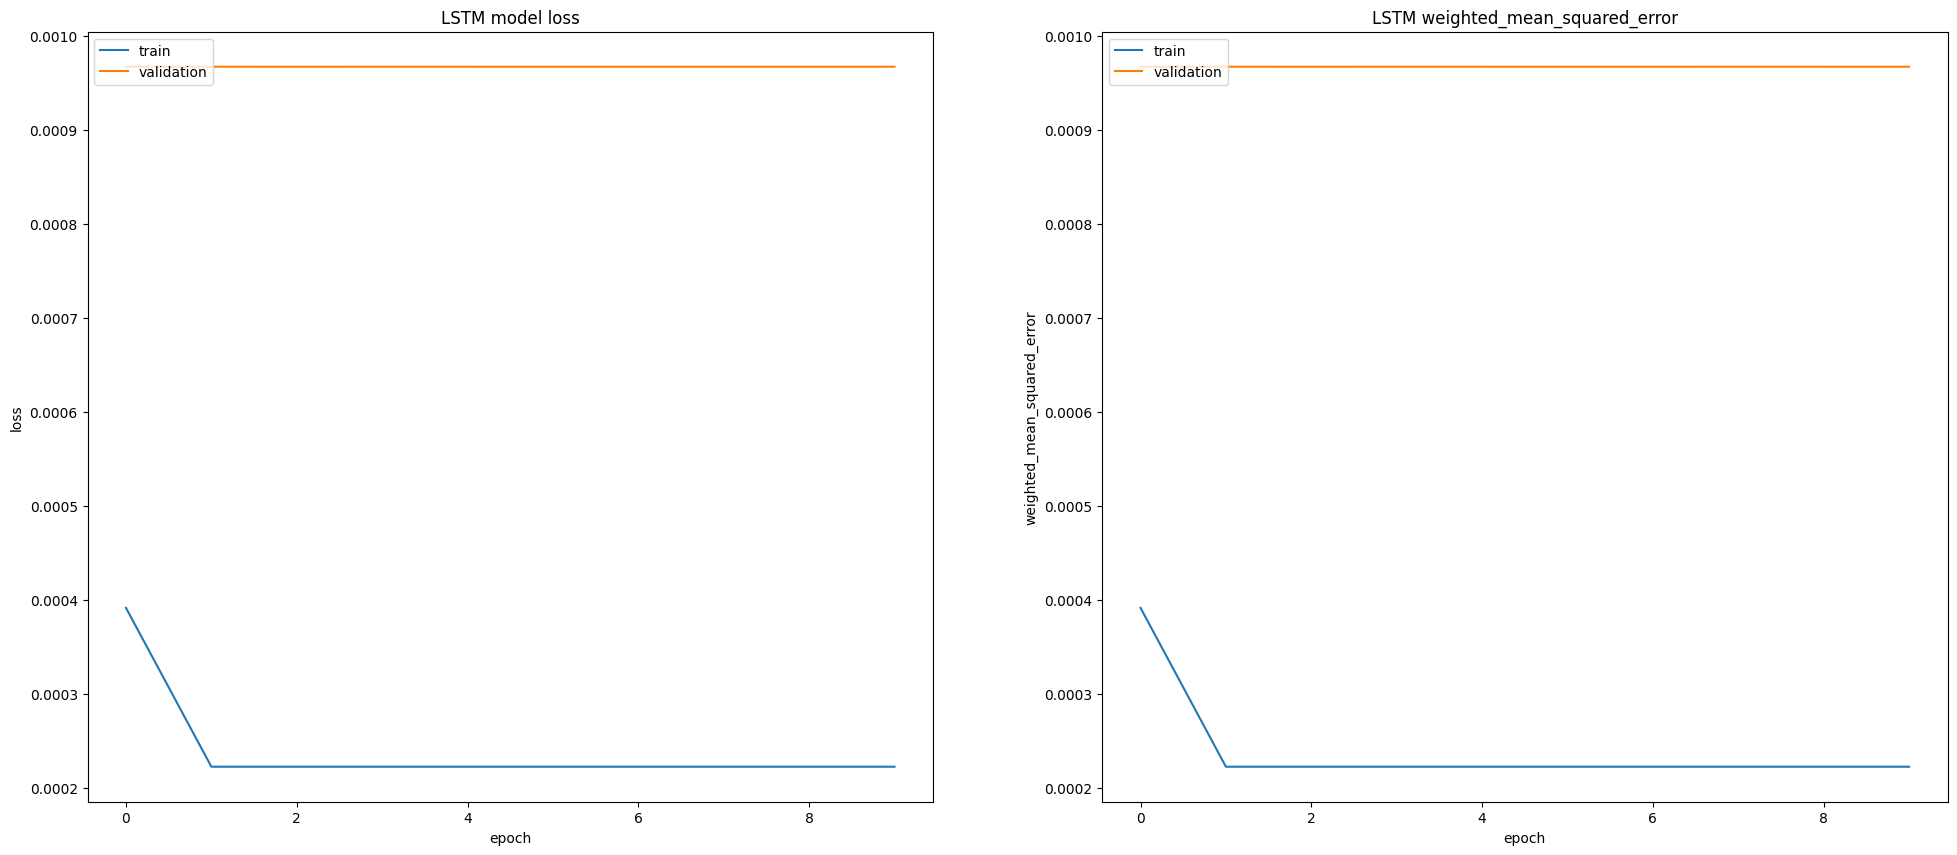

In [3]:
global_p = EmptyPortfolio()

lstmf = LSTMFactory('2019-01-01', '2020-01-01', '2020-07-01', '2020-07-31', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()
model.fit(data)
model.evaluate(data, 'val')

portfolio = LongPortfolio(data, model)
print(portfolio.performance)
global_p.add_portfolio(portfolio)
del data

lstmf = LSTMFactory('2019-02-01', '2020-02-01', '2020-08-01', '2020-08-31', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()
model.fit(data)
model.evaluate(data, 'val')

portfolio = LongPortfolio(data, model)
print(portfolio.performance)
global_p.add_portfolio(portfolio)

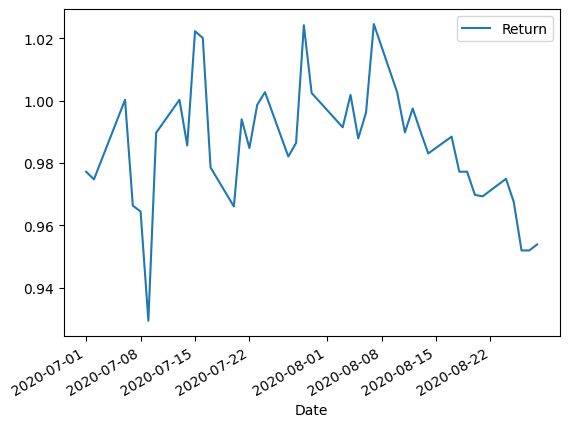

In [19]:
global_p.performance.plot_portfolio_value()

# Demo for Self Defined Model

Below I demo how to use the library to create an advanced neural network mannually. It is as easy as:
* Derive a subclass from `DlModel`, ovrride its `_create_model()` function to define model
* Derive a subclass from `DlFactory`, override its `_load()` function to define data and model that are going to be returned
* Perform standard client codes to perform deep learning tasks

In [1]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *
from Stlearn.Portfolio import *

class CNNLSTMModel(DlModel):
    def _create_model(self):
        self._model = tf.keras.Sequential([
            tf.keras.layers.Conv1D(25, padding='same', kernel_size=(1,), 
                               activation='relu', input_shape=self._input_shape),
            tf.keras.layers.Conv1D(50, padding='same', kernel_size=(1,), 
                               activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.LSTM(1, return_sequences=True)
        ])
    pass

class CNNLSTMFactory(DlFactory):
    def _load(self):
        super()._load()
        self._model = CNNLSTMModel('CNNLSTM', self._data.get_shape())
    pass

In [ ]:
#global_p = EmptyPortfolio()

lstmf = CNNLSTMFactory('2019-01-01', '2020-01-01', '2020-07-01', '2020-08-01', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()
model.fit(data)
model.evaluate(data, 'val')

portfolio = LongBestThreePortfolio(data, model)
print(portfolio.performance)
portfolio = LongMarketPortfolio(data, model)
print(portfolio.performance)
#global_p.add_portfolio(portfolio)
del data

lstmf = CNNLSTMFactory('2019-02-01', '2020-02-01', '2020-08-01', '2020-09-01', 60)
data = lstmf.create_data()
model = lstmf.create_model()
model.info()
model.fit(data)
model.evaluate(data, 'val')

portfolio = LongBestThreePortfolio(data, model)
print(portfolio.performance)
portfolio = LongMarketPortfolio(data, model)
print(portfolio.performance)
#global_p.add_portfolio(portfolio)

X_train shape: (95638, 60, 152)
y_train shape: (95638,)
X_valid shape: (62137, 60, 152)
y_valid shape: (62137,)
X_test shape: (10975, 60, 152)
y_test shape: (10975,)
Parameters number in model:  5333
Epoch 1/10


2022-11-12 12:45:38.490367: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2989/2989 [==============================] - 46s 15ms/step - loss: 3.4236e-04 - mean_squared_error: 3.4236e-04 - weighted_mean_squared_error: 3.4236e-04 - val_loss: 9.2922e-04 - val_mean_squared_error: 9.2922e-04 - val_weighted_mean_squared_error: 9.2922e-04
Epoch 2/10
2989/2989 [==============================] - 29s 10ms/step - loss: 2.2316e-04 - mean_squared_error: 2.2316e-04 - weighted_mean_squared_error: 2.2316e-04 - val_loss: 9.2922e-04 - val_mean_squared_error: 9.2922e-04 - val_weighted_mean_squared_error: 9.2922e-04
Epoch 3/10
2989/2989 [==============================] - 29s 10ms/step - loss: 2.2316e-04 - mean_squared_error: 2.2316e-04 - weighted_mean_squared_error: 2.2316e-04 - val_loss: 9.2922e-04 - val_mean_squared_error: 9.2922e-04 - val_weighted_mean_squared_error: 9.2922e-04
Epoch 4/10
2989/2989 [==============================] - 29s 10ms/step - loss: 2.2316e-04 - mean_squared_error: 2.2316e-04 - weighted_mean_squared_error: 2.2316e-04 - val_loss: 9.2922e-04 - val_mean_squ

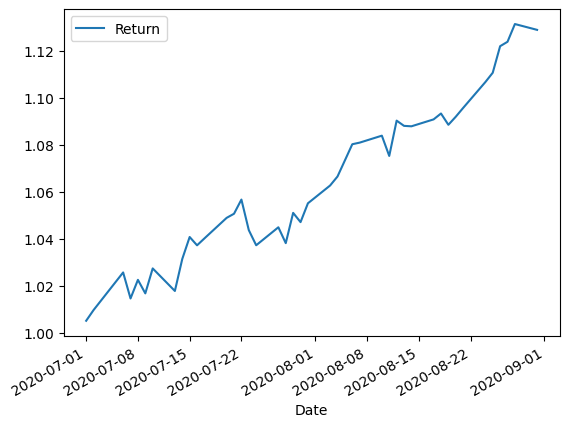

In [8]:
LongMarketPortfolio.global_portfolio.performance.plot_portfolio_value()

Train[2019-01-01 To 2020-01-01), Validation[2020-01-01 To 2020-07-01), Test[2020-07-01 To 2020-08-01]
X_train shape: (95656, 60, 152)
y_train shape: (95656,)
X_valid shape: (62144, 60, 152)
y_valid shape: (62144,)
X_test shape: (10976, 60, 152)
y_test shape: (10976,)
Parameters number in model:  25376
Epoch 1/10


2022-11-09 17:14:51.285994: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2990/2990 [==============================] - 51s 17ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - weighted_mean_squared_error: 0.0131 - val_loss: 9.4087e-04 - val_mean_squared_error: 9.4087e-04 - val_weighted_mean_squared_error: 9.4087e-04
Epoch 2/10
2990/2990 [==============================] - 47s 16ms/step - loss: 2.5142e-04 - mean_squared_error: 2.5142e-04 - weighted_mean_squared_error: 2.5142e-04 - val_loss: 9.7846e-04 - val_mean_squared_error: 9.7846e-04 - val_weighted_mean_squared_error: 9.7846e-04
Epoch 3/10
2990/2990 [==============================] - 339s 114ms/step - loss: 2.5141e-04 - mean_squared_error: 2.5141e-04 - weighted_mean_squared_error: 2.5141e-04 - val_loss: 9.7708e-04 - val_mean_squared_error: 9.7708e-04 - val_weighted_mean_squared_error: 9.7708e-04
Epoch 4/10
2990/2990 [==============================] - 47s 16ms/step - loss: 2.5115e-04 - mean_squared_error: 2.5115e-04 - weighted_mean_squared_error: 2.5115e-04 - val_loss: 9.3629e-04 - val_mean_squared_error

312/312 [==============================] - 1s 3ms/step - loss: 9.3121e-04 - mean_squared_error: 9.3121e-04 - weighted_mean_squared_error: 9.3121e-04
CNNLSTM: Test loss: 0.00093
312/312 [==============================] - 1s 3ms/step
[2020-11-02 00:00:00 - 2020-11-30 00:00:00] mean return: 4.70, volatility: 0.26, sharpe ratio: 17.64
Train[2019-06-01 To 2020-06-01), Validation[2020-06-01 To 2020-12-01), Test[2020-12-01 To 2021-01-01]
X_train shape: (95407, 60, 152)
y_train shape: (95407,)
X_valid shape: (63843, 60, 152)
y_valid shape: (63843,)
X_test shape: (10977, 60, 152)
y_test shape: (10977,)
Parameters number in model:  25376
Epoch 1/10
2982/2982 [==============================] - 51s 17ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - weighted_mean_squared_error: 0.0069 - val_loss: 5.0522e-04 - val_mean_squared_error: 5.0522e-04 - val_weighted_mean_squared_error: 5.0522e-04
Epoch 2/10
2982/2982 [==============================] - 48s 16ms/step - loss: 6.8198e-04 - mean_squared_er

Epoch 4/10
3015/3015 [==============================] - 48s 16ms/step - loss: 7.5413e-04 - mean_squared_error: 7.5413e-04 - weighted_mean_squared_error: 7.5413e-04 - val_loss: 6.0727e-04 - val_mean_squared_error: 6.0727e-04 - val_weighted_mean_squared_error: 6.0727e-04
Epoch 5/10
3015/3015 [==============================] - 48s 16ms/step - loss: 7.5341e-04 - mean_squared_error: 7.5341e-04 - weighted_mean_squared_error: 7.5341e-04 - val_loss: 4.4744e-04 - val_mean_squared_error: 4.4744e-04 - val_weighted_mean_squared_error: 4.4744e-04
Epoch 6/10
3015/3015 [==============================] - 48s 16ms/step - loss: 7.5977e-04 - mean_squared_error: 7.5977e-04 - weighted_mean_squared_error: 7.5977e-04 - val_loss: 4.7270e-04 - val_mean_squared_error: 4.7270e-04 - val_weighted_mean_squared_error: 4.7270e-04
Epoch 7/10
3015/3015 [==============================] - 48s 16ms/step - loss: 7.5573e-04 - mean_squared_error: 7.5573e-04 - weighted_mean_squared_error: 7.5573e-04 - val_loss: 4.4548e-04 - v

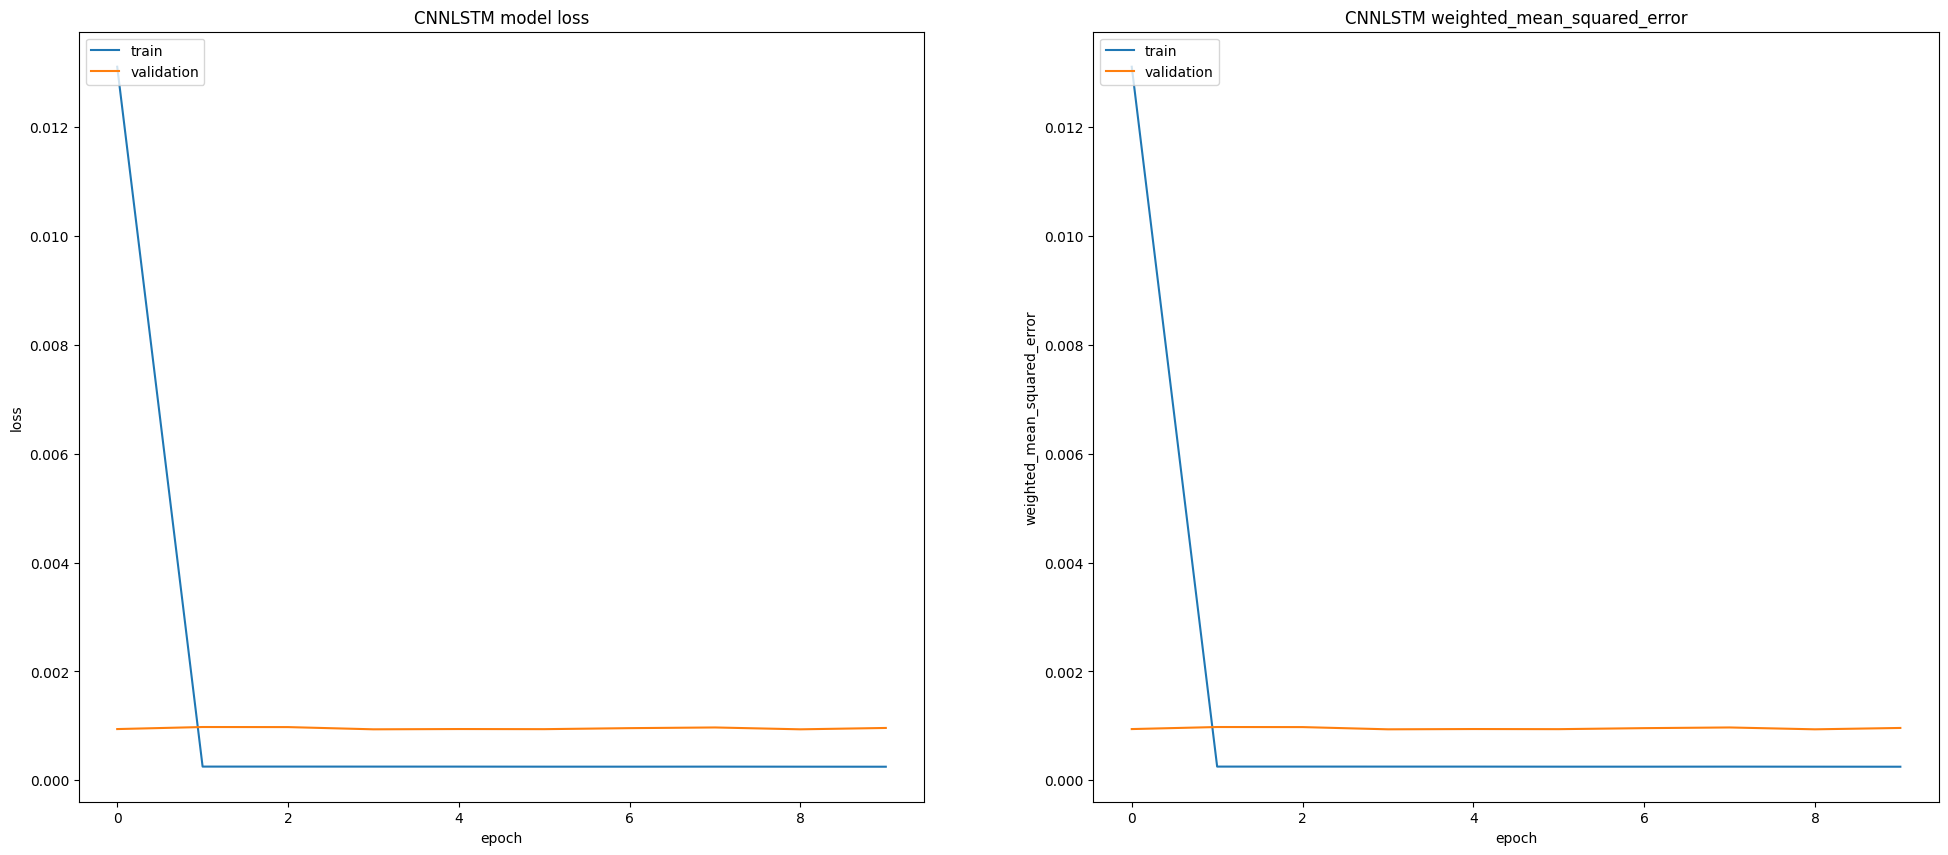

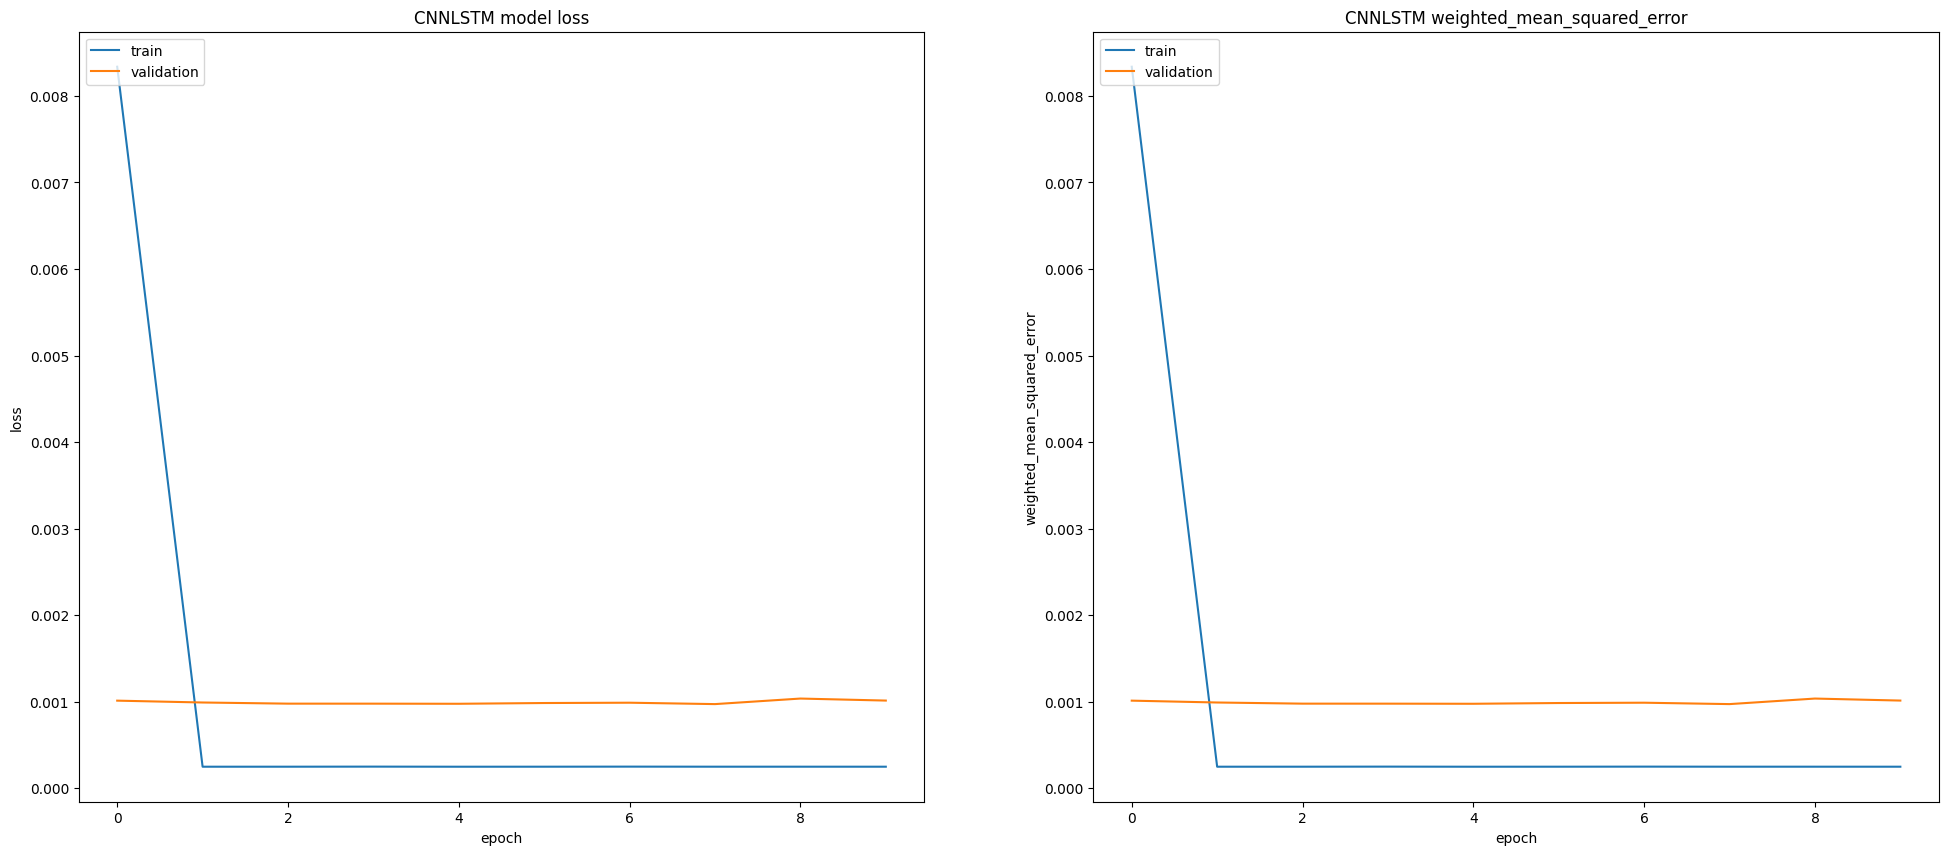

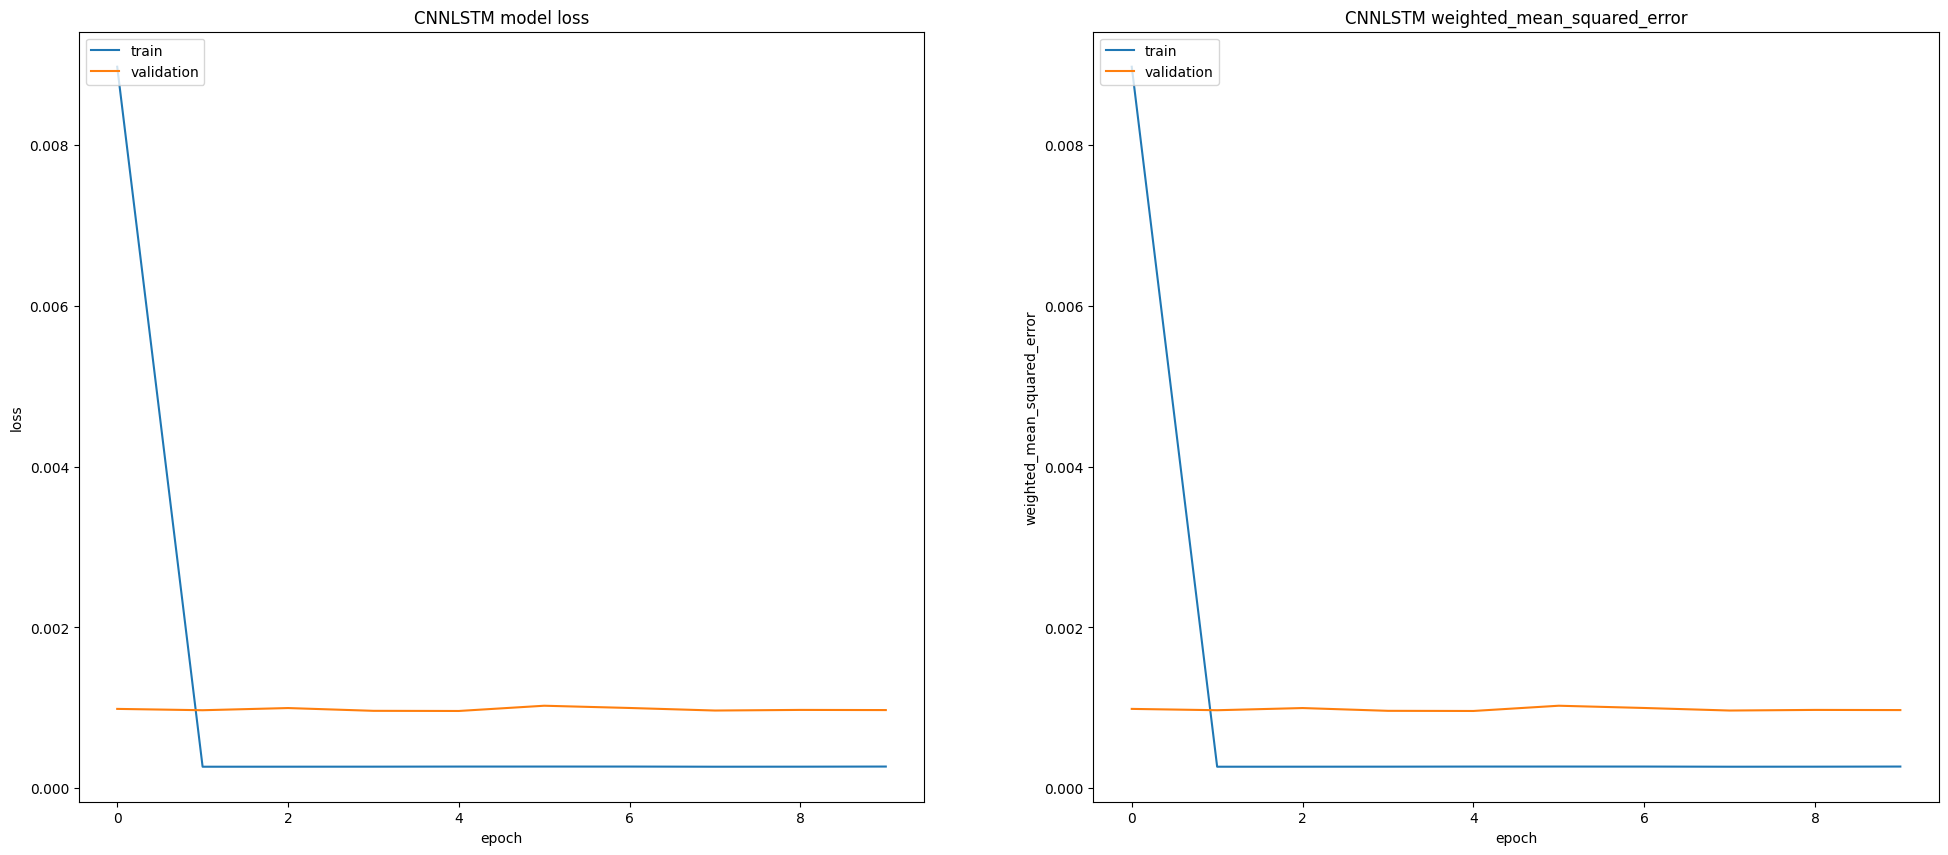

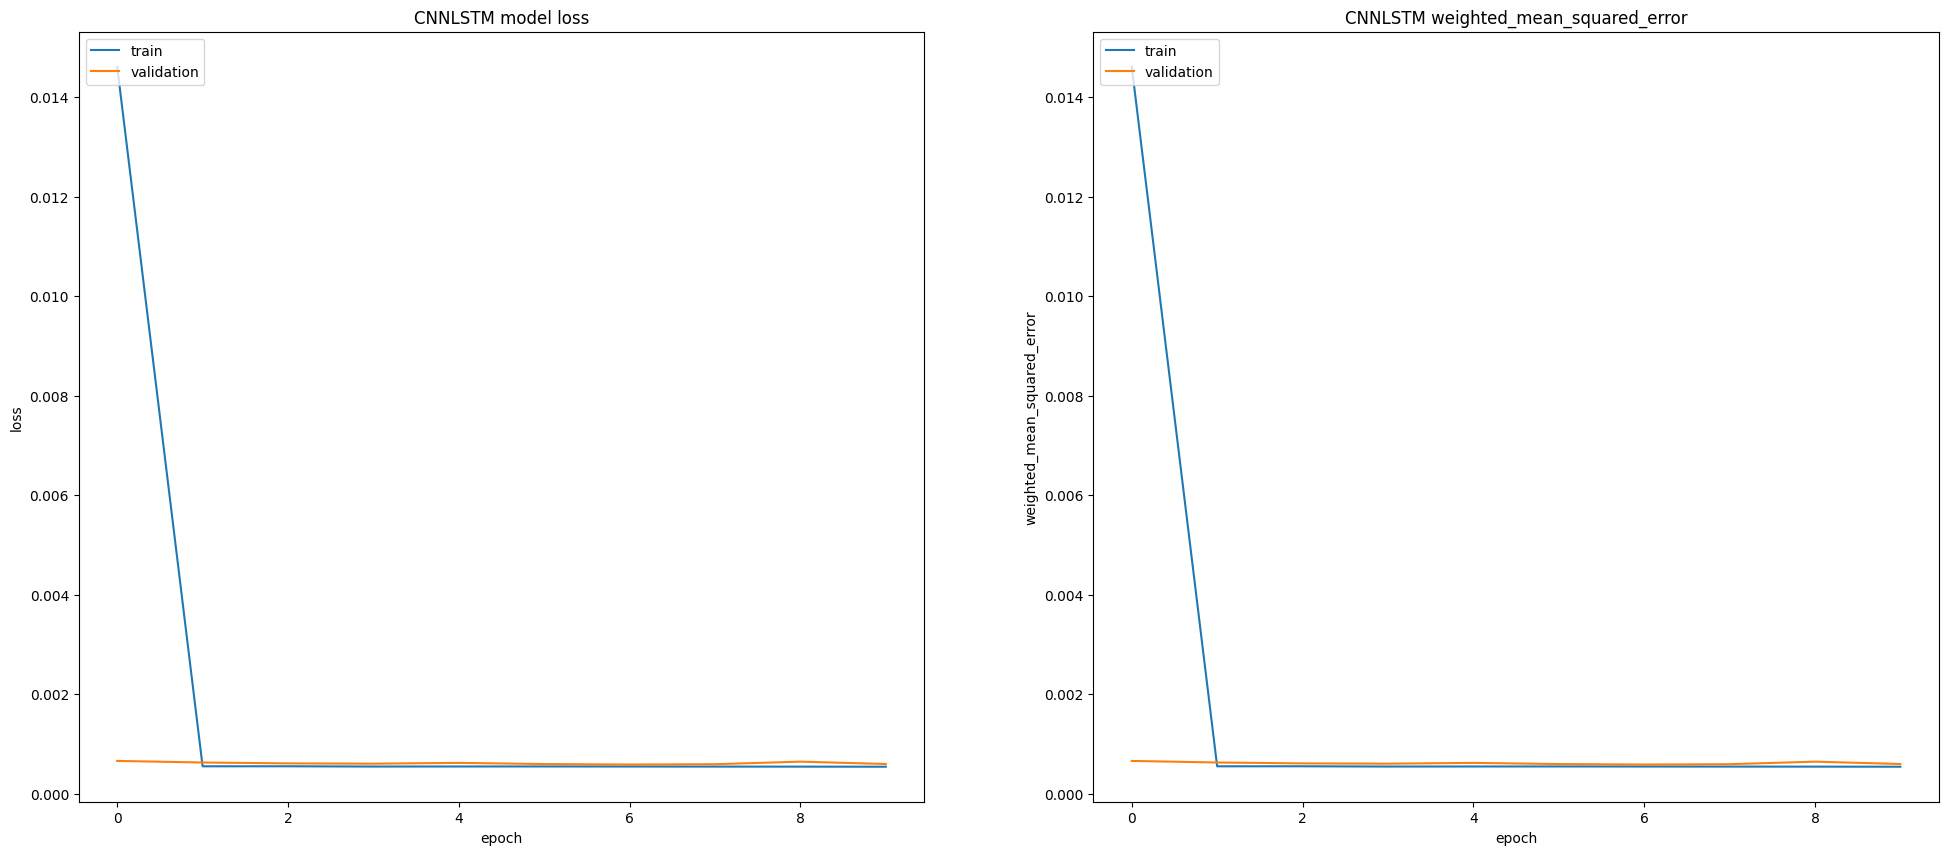

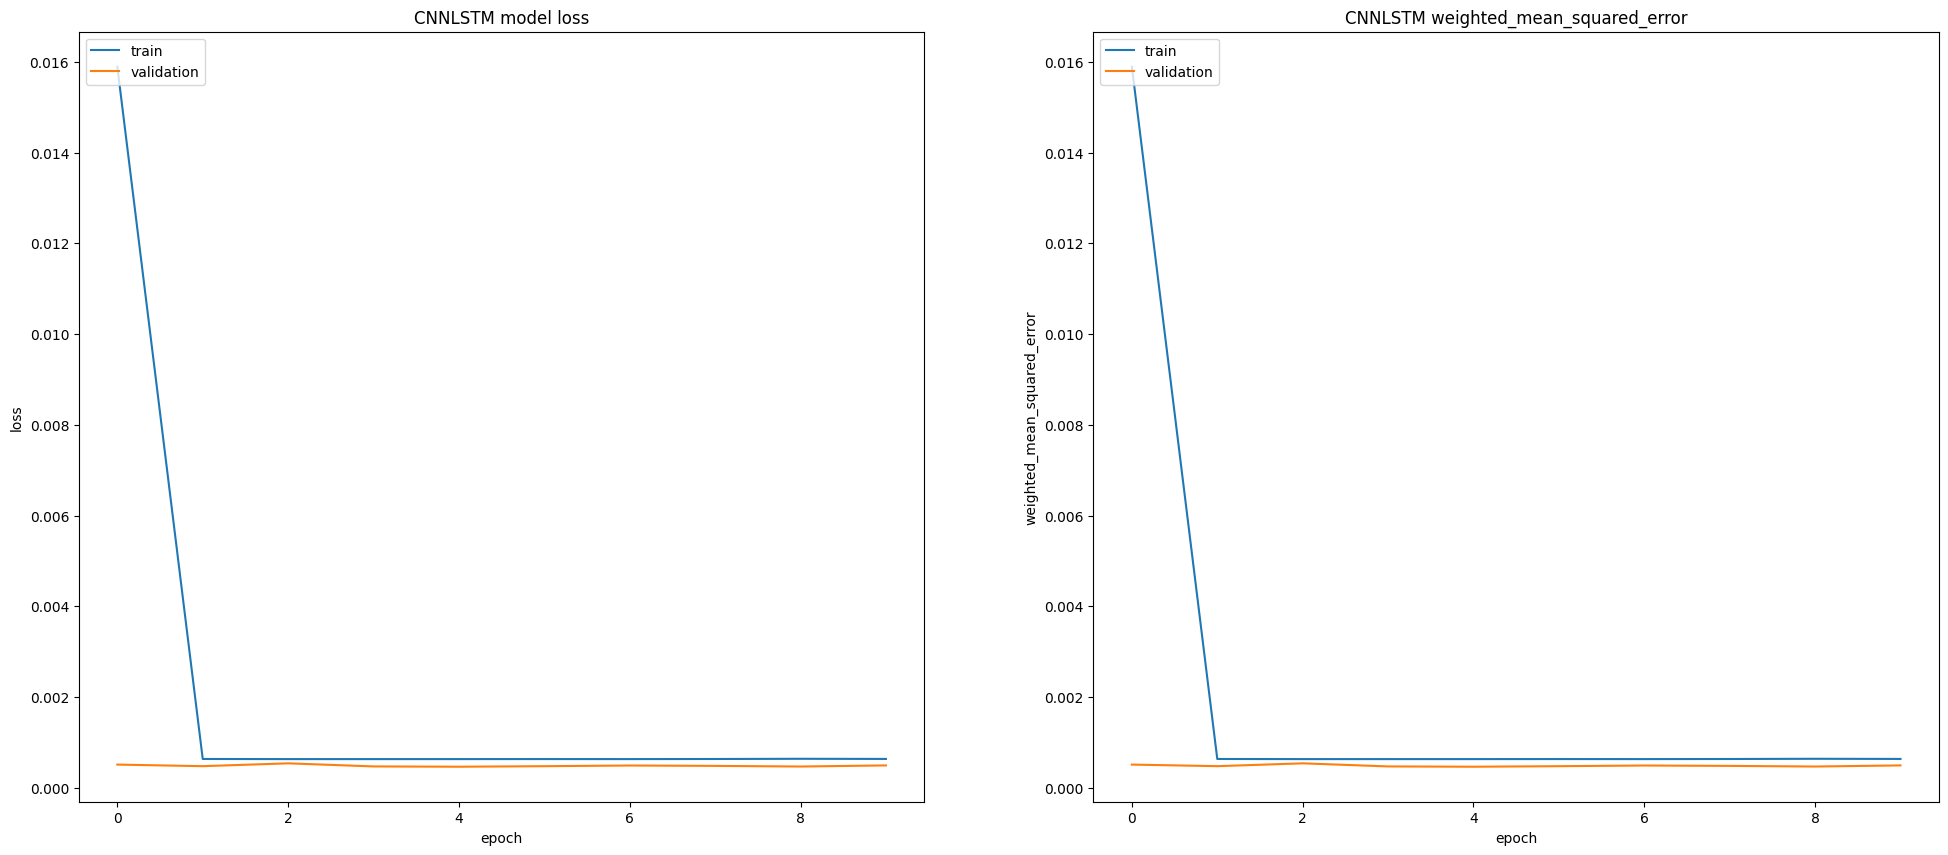

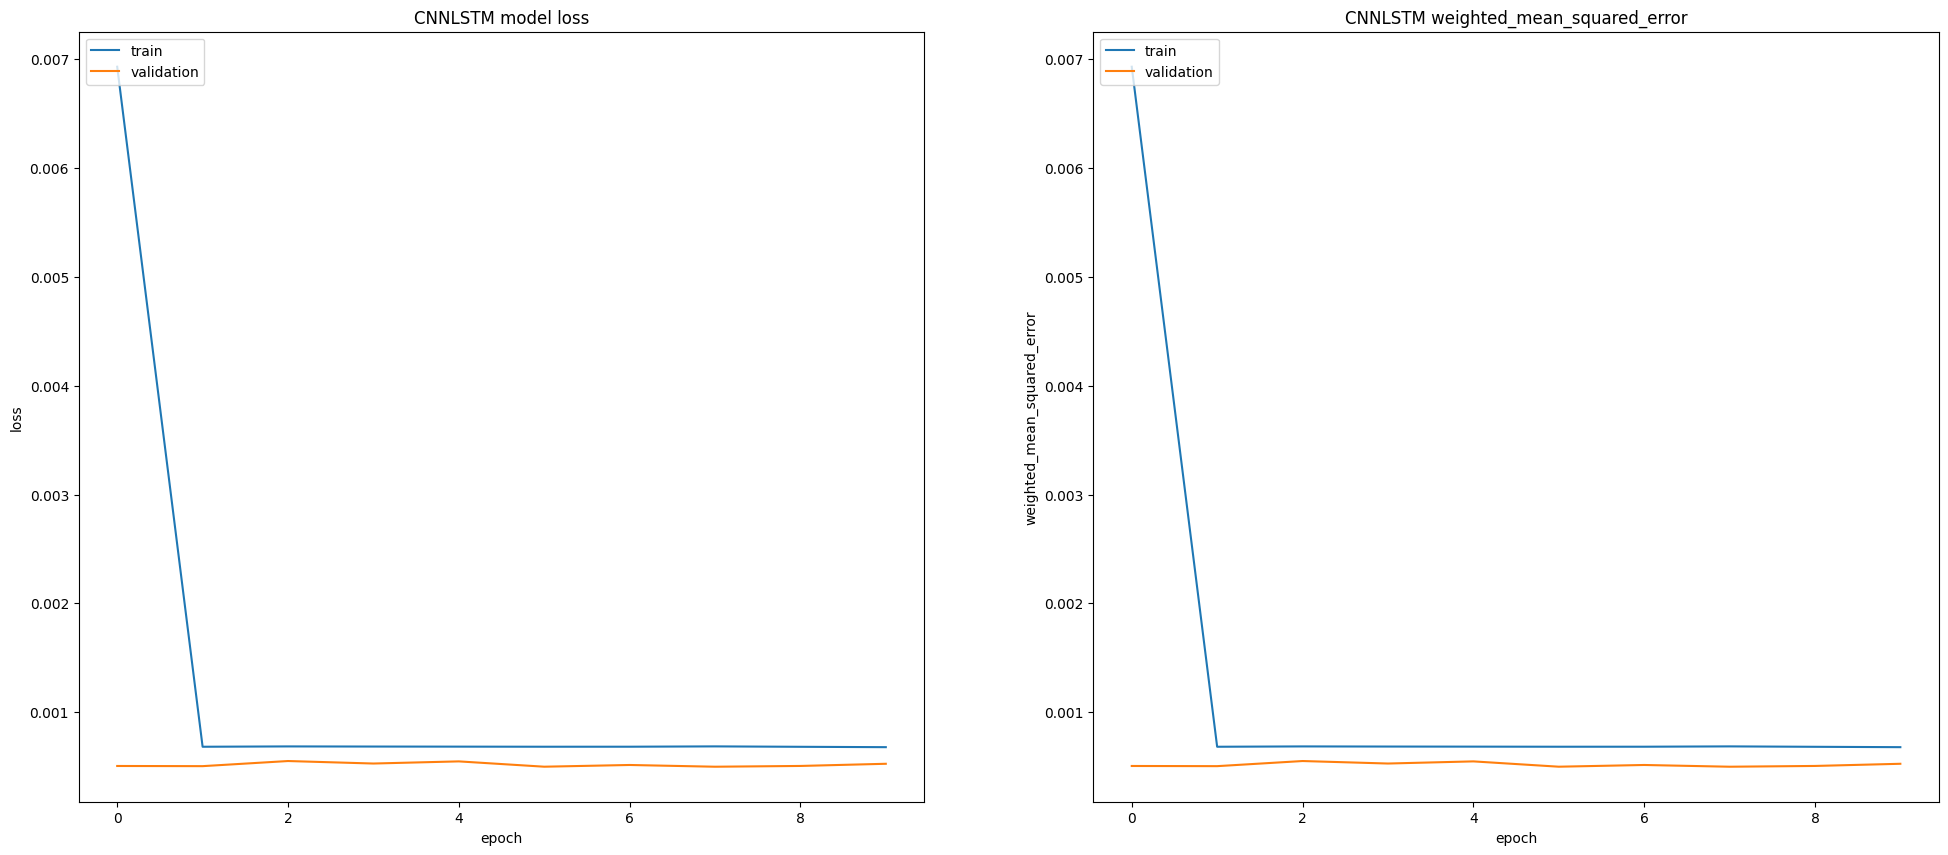

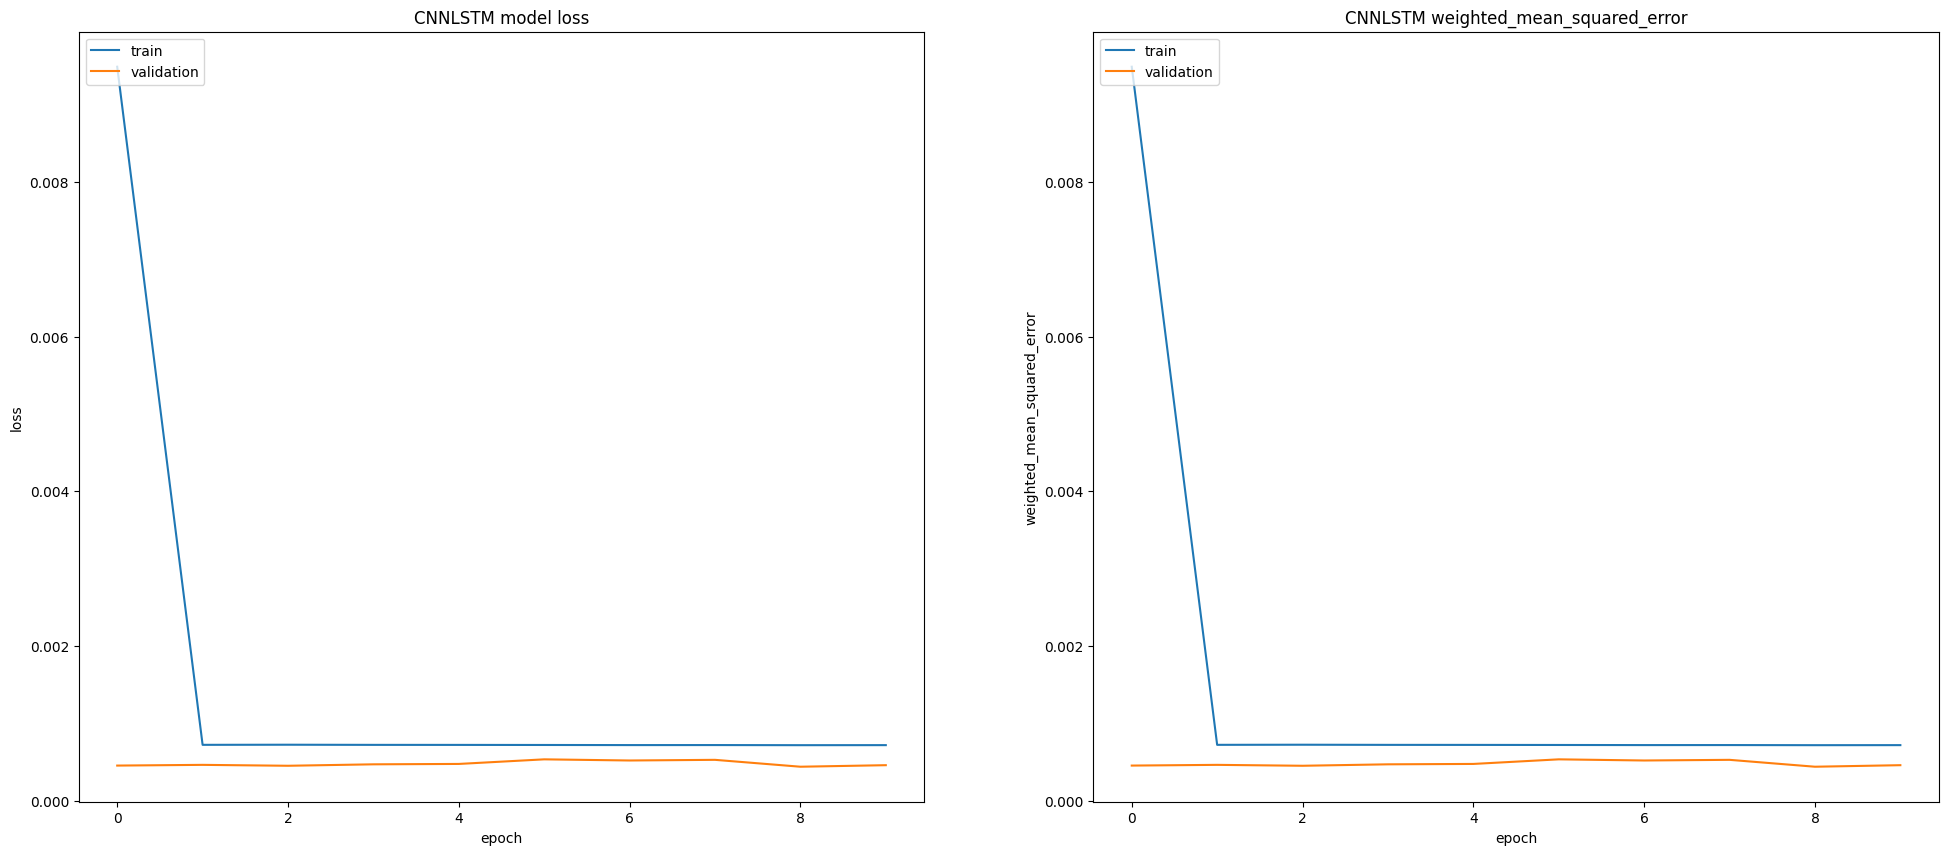

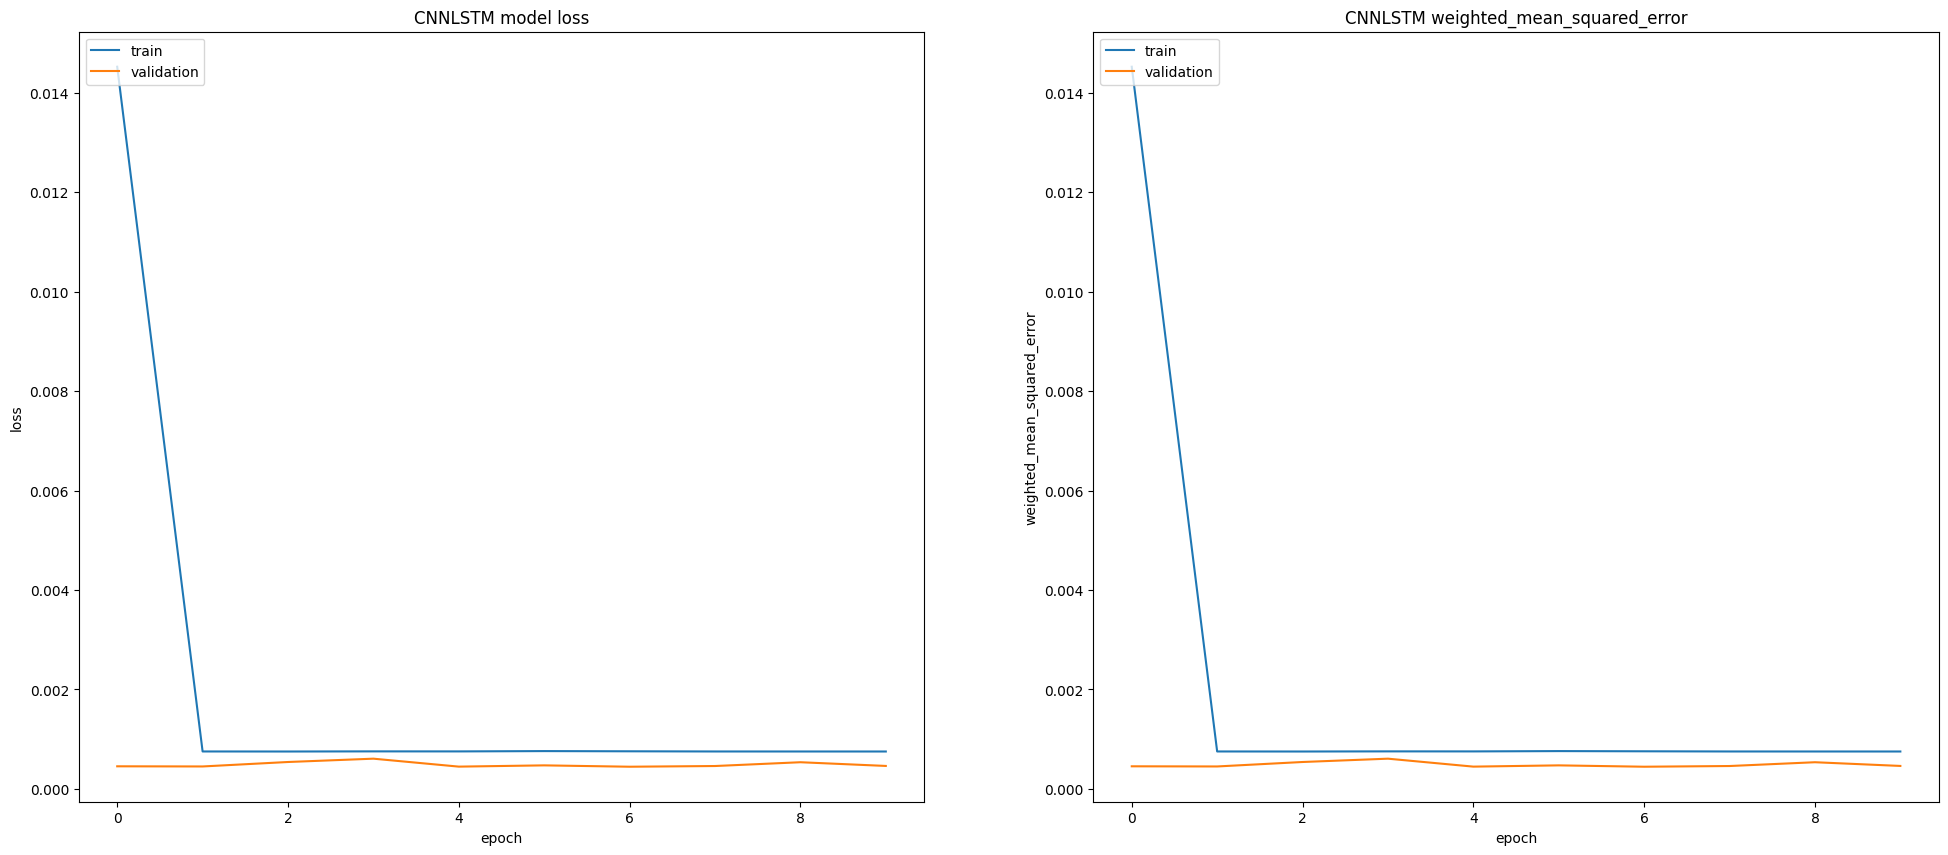

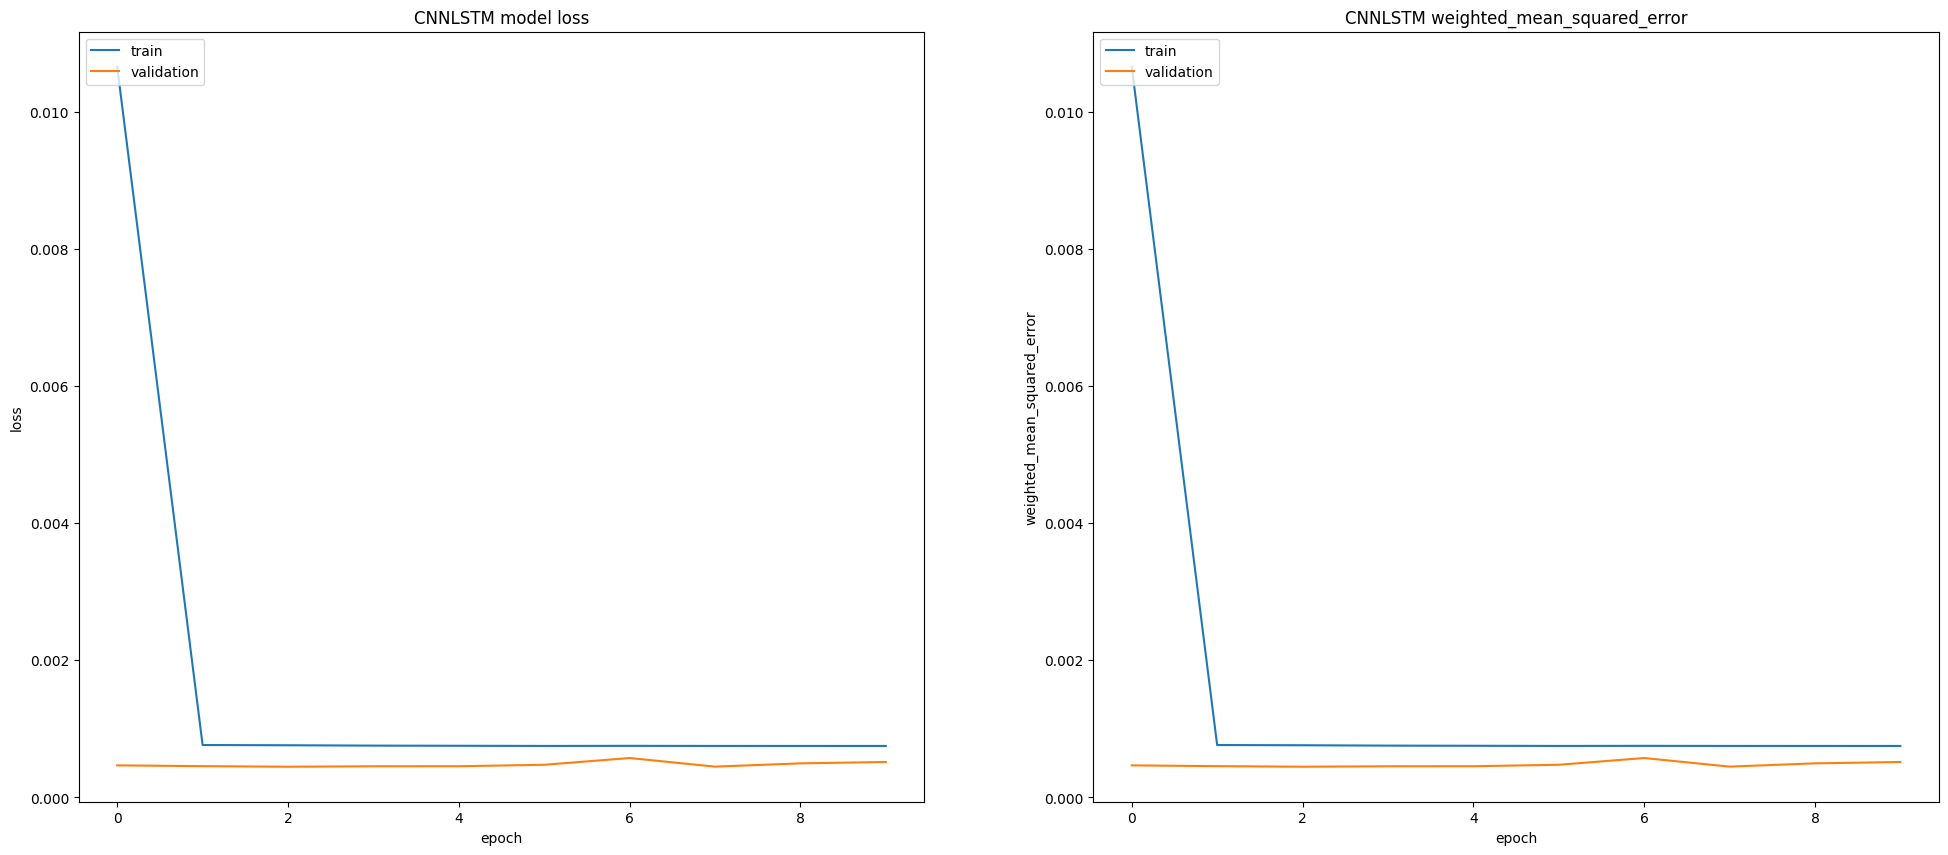

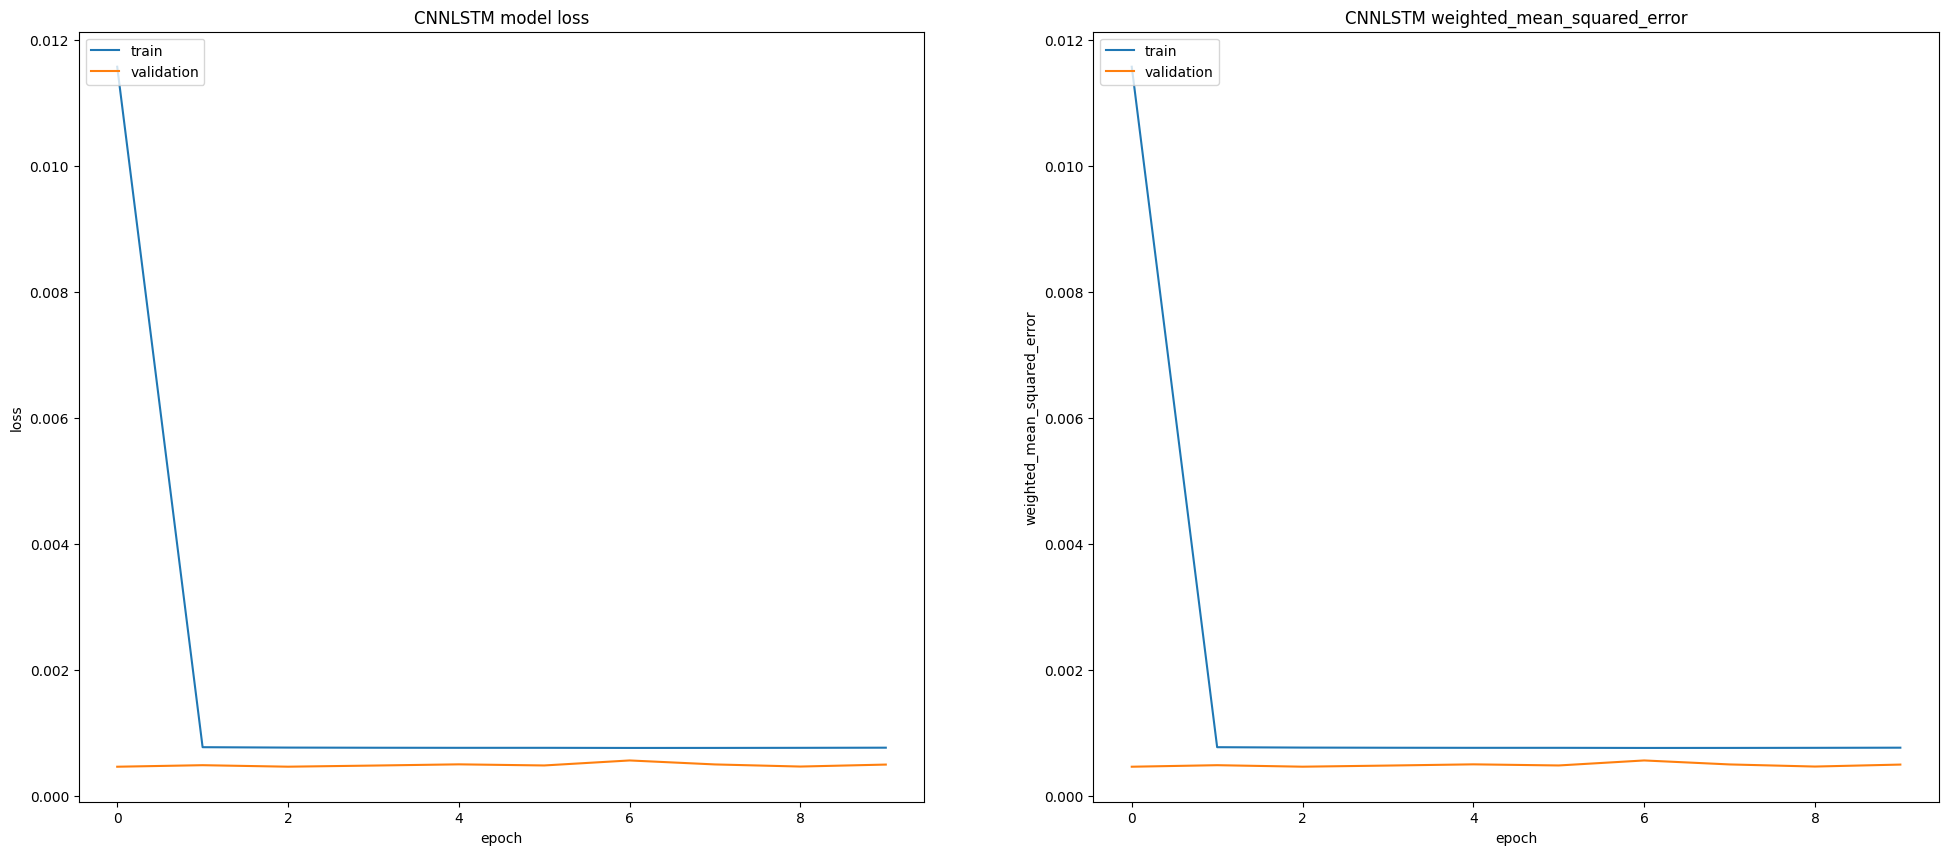

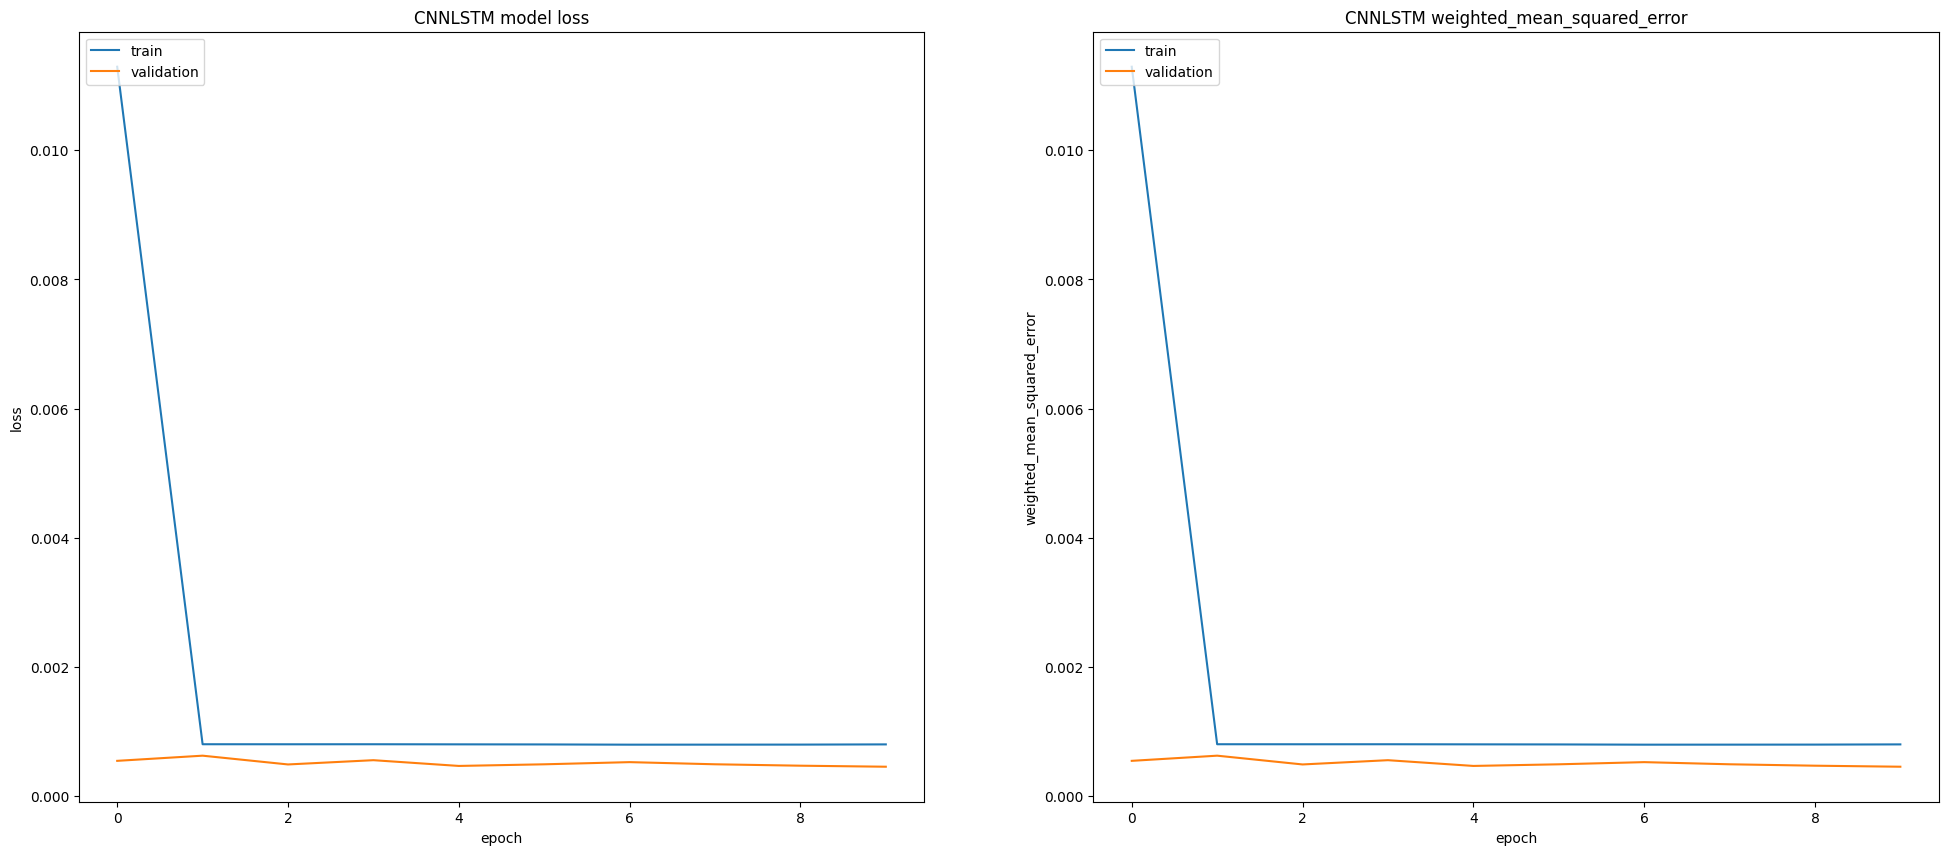

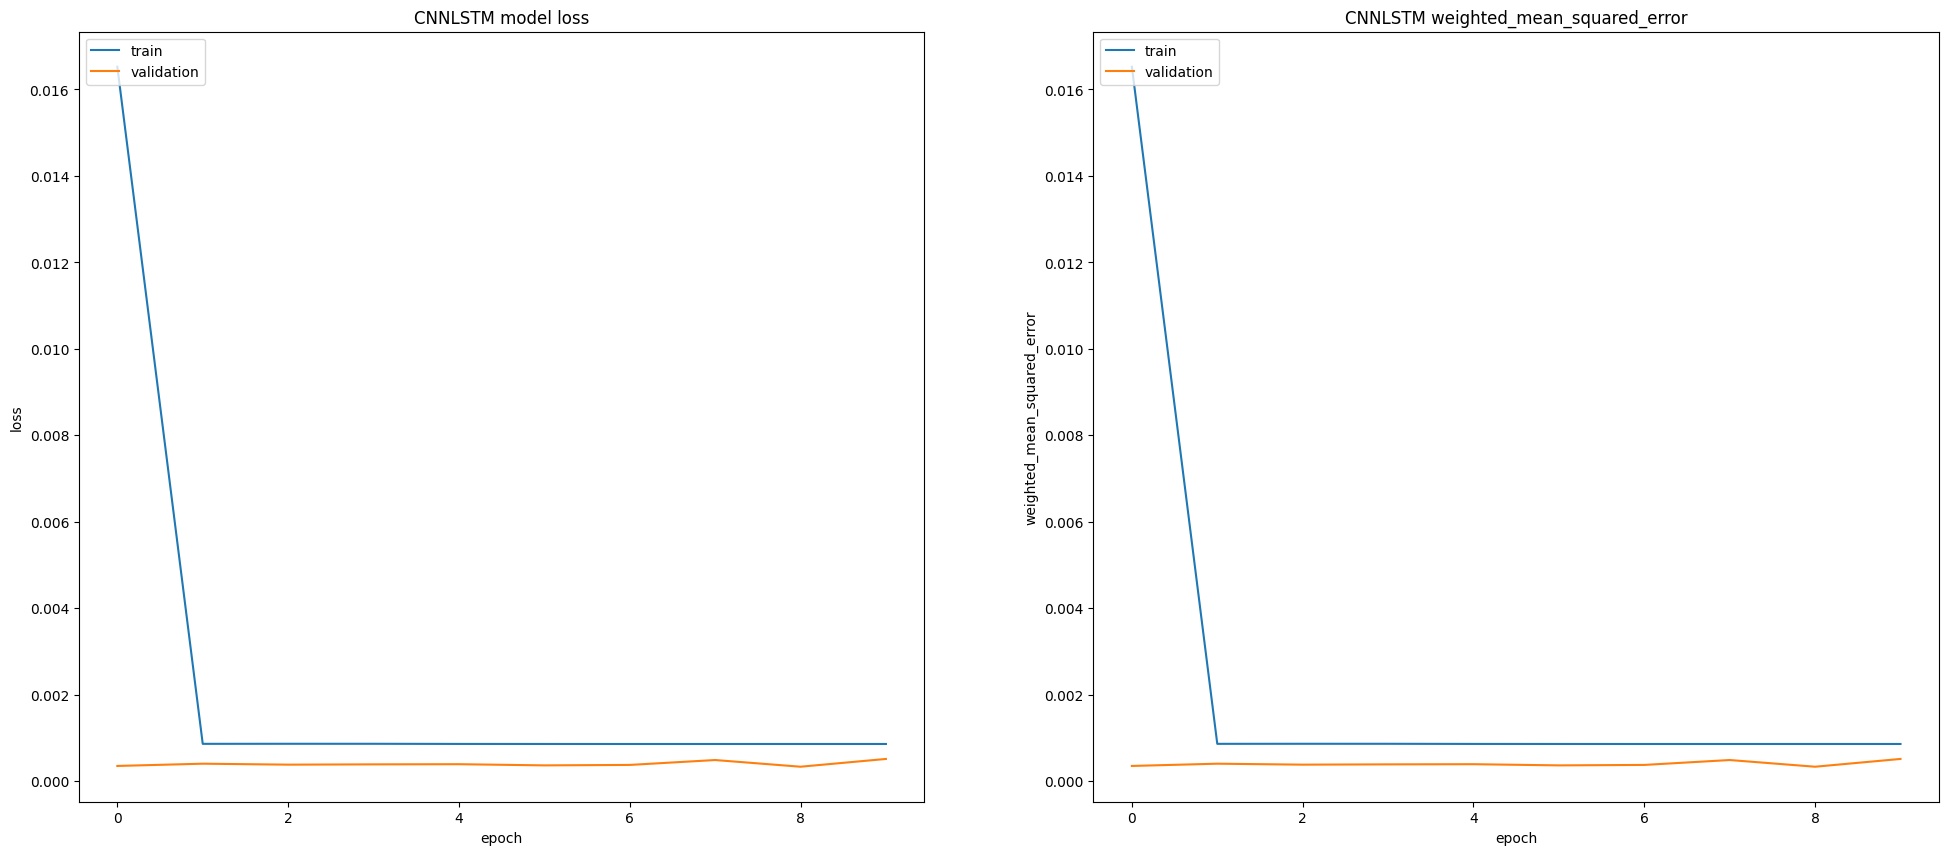

In [2]:
import sys
sys.path.append('./Stlearn')
from Stlearn.Factory import *
from Stlearn.Portfolio import *

class CNNLSTMModel(DlModel):
    def _create_model(self):
        self._model = tf.keras.Sequential([
            tf.keras.layers.Conv1D(25, padding='same', kernel_size=(1,), 
                               activation='relu', input_shape=self._input_shape),
            tf.keras.layers.Conv1D(50, padding='same', kernel_size=(1,), 
                               activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.LSTM(1, return_sequences=True)
        ])
    pass

class CNNLSTMFactory(DlFactory):
    def _load(self):
        super()._load()
        self._model = CNNLSTMModel('CNNLSTM', self._data.get_shape())
    pass


train_start_date_s = '2019-01-01'
val_start_date_s = '2020-01-01'
test_start_date_s = '2020-07-01'
test_end_date_s = '2020-08-01'

freq = 'month'
offset = 1
limit = 12

train_start_date_generator = DateGenerator(Date.create_from_str(train_start_date_s), freq, offset, limit)
val_start_date_generator = DateGenerator(Date.create_from_str(val_start_date_s), freq, offset, limit)
test_start_date_generator = DateGenerator(Date.create_from_str(test_start_date_s), freq, offset, limit)
test_end_date_generator = DateGenerator(Date.create_from_str(test_end_date_s), freq, offset, limit)




global_p = EmptyPortfolio()


while (train_start_date_generator.has_next()):
    
    train_start_date = train_start_date_generator.next()
    val_start_date = val_start_date_generator.next()
    test_start_date = test_start_date_generator.next()
    test_end_date = test_end_date_generator.next()
    
    lg = 'Train[{} To {}), Validation[{} To {}), Test[{} To {})'.format(
        str(train_start_date), str(val_start_date), 
        str(val_start_date), str(test_start_date),
        str(test_start_date), str(test_end_date))
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print(lg)
    
    lstmf = CNNLSTMFactory(str(train_start_date), str(val_start_date), 
                           str(test_start_date), str(test_end_date), 60)
    data = lstmf.create_data()
    model = lstmf.create_model()
    model.info()
    model.fit(data)
    model.evaluate(data, 'val')

    portfolio = LongPortfolio(data, model)
    print(portfolio.performance)
    global_p.add_portfolio(portfolio)
    del data

In [3]:
LongPortfolio.global_portfolio.performance

[2020-07-01 00:00:00 - 2020-08-31 00:00:00] mean return: 0.12, volatility: 0.20, sharpe ratio: 0.47

In [4]:
LongMarketPortfolio.global_portfolio.performance

[2020-07-01 00:00:00 - 2020-08-31 00:00:00] mean return: 1.05, volatility: 0.11, sharpe ratio: 9.29

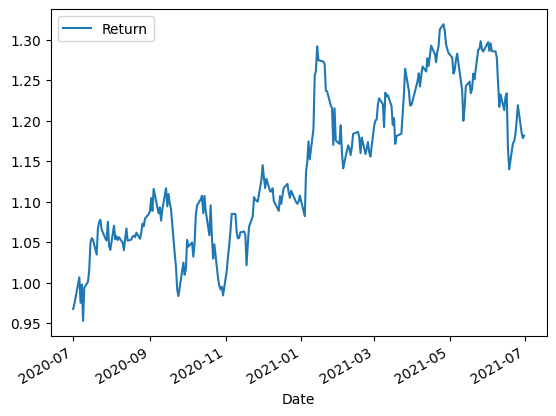

In [3]:
global_p.performance.plot_portfolio_value()

In [17]:
m.std() * np.sqrt(252)

market return    0.109605
dtype: float64

In [4]:
global_p.performance

[2020-07-01 00:00:00 - 2021-06-30 00:00:00] mean return: 0.23, volatility: 0.28, sharpe ratio: 0.71